<h1 style="text-align: center; font-family: Arial, sans-serif; color: #4CAF50;">Chess Game Analysis from Lichess</h1>
<h2 style="text-align: center; font-family: Arial, sans-serif; ">What are the best openings in chess</h2>

<p style="font-size: 16px; font-family: Arial, sans-serif; line-height: 1.6;">
    Welcome to the analysis of chess games data obtained from 
    <a href="https://lichess.org/" target="_blank" style="color: #4CAF50; text-decoration: none;">Lichess</a>. 
    This analysis explores trends, openings, and strategies to uncover insights from the dataset. 
</p>
<h2 style="font-family: Arial, sans-serif; color: #4CAF50;">Objectives:</h2>
<ul style="font-size: 14px; font-family: Arial, sans-serif; line-height: 1.8;">
    <li>Identify the most popular chess openings and their success rates.</li>
    <li>Compare white and black performances across various game types (e.g., bullet, blitz, rapid).</li>
</ul>
<p style="font-size: 16px; font-family: Arial, sans-serif; line-height: 1.6;">
    As a chess player, I always wondered what is the best chess opening to use. 
    Seeing the data, I wanted to find out if I could figure this out by analyzing the said data. 
    My dataset consists of thousands of chess games played online.
</p>


In [4]:
import csv  
import numpy as np  
import pandas as pd  
from IPython.display import display 
import seaborn as sns
import matplotlib.pyplot as plt 



<h1 style="font-size: 24px; font-family: Arial, sans-serif; color: #4CAF50;">Reading the Data</h1>


In [5]:
chessGames = pd.read_csv('games.csv')


<h1 style="font-size: 24px; font-family: Arial, sans-serif; color: #4CAF50;">Cleaning the Data</h1>


In [6]:
display(chessGames)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


### 2.1 Making the time of the game readable 

First thing I want to do is clean up the created_at and last_move_at data getting the date that the game was played. I will trim it to just have the year-month-day in my data 

In [7]:
chessGames_times = chessGames[['created_at']].copy() 
display(chessGames_times)

,created_at
0,1.504210e+12
1,1.504130e+12
2,1.504130e+12
3,1.504110e+12
4,1.504030e+12
...,...
20053,1.499791e+12
20054,1.499698e+12
20055,1.499698e+12
20056,1.499696e+12


In [8]:

chessGames_times['time'] = pd.to_datetime(chessGames_times['created_at']/1000, unit='s', origin='unix')
display(chessGames_times)




,created_at,time
0,1.504210e+12,2017-08-31 20:06:40.000000000
1,1.504130e+12,2017-08-30 21:53:20.000000000
2,1.504130e+12,2017-08-30 21:53:20.000000000
3,1.504110e+12,2017-08-30 16:20:00.000000000
4,1.504030e+12,2017-08-29 18:06:40.000000000
...,...,...
20053,1.499791e+12,2017-07-11 16:35:14.342000008
20054,1.499698e+12,2017-07-10 14:48:09.759999990
20055,1.499698e+12,2017-07-10 14:44:37.493000031
20056,1.499696e+12,2017-07-10 14:15:27.019000053


In [9]:
chessGames_times['time'] = chessGames_times['time'].dt.date 
display(chessGames_times)

,created_at,time
0,1.504210e+12,2017-08-31
1,1.504130e+12,2017-08-30
2,1.504130e+12,2017-08-30
3,1.504110e+12,2017-08-30
4,1.504030e+12,2017-08-29
...,...,...
20053,1.499791e+12,2017-07-11
20054,1.499698e+12,2017-07-10
20055,1.499698e+12,2017-07-10
20056,1.499696e+12,2017-07-10


In [10]:
del chessGames['last_move_at']
chessGames['created_at'] = chessGames_times['time']
chessGames.head(1)

,id,rated,created_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


### 2.2 Cleaning increment code data

Every online chess game usually gets categorized in three sections, 
1. Bullet (each side has 1 minute or less )

2. Blitz (each side has 5 to 2 minutes)
 
3. Rapid (each side has more than 5 minutes)

I will sort my increment code data in that order instead of having random different numbers for each game 

In [11]:
chessGames['increment_code'] = chessGames['increment_code'].str.split('+').str[0]
print(chessGames['increment_code'])
print(".............")
chessGames['increment_code'] = chessGames['increment_code'].astype(int)
chessGames.loc[chessGames['increment_code'] < 2, 'type_of_game'] = 'bullet'
chessGames.loc[(chessGames['increment_code'] >=2) & (chessGames['increment_code']<=5) , 'type_of_game'] = 'blitz'
chessGames.loc[(chessGames['increment_code'] >5), 'type_of_game'] = 'rapid'

print(chessGames['type_of_game'])
del chessGames['increment_code']


0        15
1         5
2         5
3        20
4        30
         ..
20053    10
20054    10
20055    10
20056    10
20057    10
Name: increment_code, Length: 20058, dtype: object
.............
0        rapid
1        blitz
2        blitz
3        rapid
4        rapid
         ...  
20053    rapid
20054    rapid
20055    rapid
20056    rapid
20057    rapid
Name: type_of_game, Length: 20058, dtype: object


### 2.3 Cleaning opening name

I want to remove the specific variation of eahc opening (for example an opening named Sicilian Defense Defense has Smith-Morra Gambit #2 and Canal Attack | Main Line)
However, I do not believe they will come in handy I will restore them in a new colum called variation. 
This colum will contain a lot of NAN values as some of openings do not have any varations   

In [12]:
display(chessGames['opening_name'])
print("............................")
openings = chessGames['opening_name'].str.split(':').str[0]
chessGames['opening_variation'] = chessGames['opening_name'].str.split(':').str[1]
chessGames['opening_name'] = openings 
display(chessGames['opening_name'])
print("............................")
display(chessGames['opening_variation'])


0              Slav Defense: Exchange Variation
1        Nimzowitsch Defense: Kennedy Variation
2         King's Pawn Game: Leonardis Variation
3        Queen's Pawn Game: Zukertort Variation
4                              Philidor Defense
                          ...                  
20053                             Dutch Defense
20054                              Queen's Pawn
20055           Queen's Pawn Game: Mason Attack
20056                              Pirc Defense
20057           Queen's Pawn Game: Mason Attack
Name: opening_name, Length: 20058, dtype: object

............................


0               Slav Defense
1        Nimzowitsch Defense
2           King's Pawn Game
3          Queen's Pawn Game
4           Philidor Defense
                ...         
20053          Dutch Defense
20054           Queen's Pawn
20055      Queen's Pawn Game
20056           Pirc Defense
20057      Queen's Pawn Game
Name: opening_name, Length: 20058, dtype: object

............................


0          Exchange Variation
1           Kennedy Variation
2         Leonardis Variation
3         Zukertort Variation
4                         NaN
                 ...         
20053                     NaN
20054                     NaN
20055            Mason Attack
20056                     NaN
20057            Mason Attack
Name: opening_variation, Length: 20058, dtype: object

As you can see there are some NAN values in my data created by some openings not being variations which in chess are called Main Line of that opening now I will deal with them by replacing them with "Main line" in my data 

In [13]:
chessGames['opening_variation'] = chessGames['opening_variation'].fillna('Main Line')
display(chessGames['opening_variation'])


0          Exchange Variation
1           Kennedy Variation
2         Leonardis Variation
3         Zukertort Variation
4                   Main Line
                 ...         
20053               Main Line
20054               Main Line
20055            Mason Attack
20056               Main Line
20057            Mason Attack
Name: opening_variation, Length: 20058, dtype: object

### 2.4 Removing Unnecessary data

I will be removing data for moves and Opening Ply (Number of moves in the opening phase)
the name of the opening and the code for it in each game determines first few moves of the game therefore I wont be needing all the moves as I wont go over it in depth. Additionally I do not care about the number of moves in the opnening phase bedcause they dont make a significant difference in any way
the game id will not be needed as we will not look through lichess website for additional data. id of white and black for each game is also not needed.  

In [14]:
del chessGames['moves']
del chessGames['opening_ply']
del chessGames['id']
del chessGames['white_id']
del chessGames['black_id']
display(chessGames)

,rated,created_at,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,type_of_game,opening_variation
0,False,2017-08-31,13,outoftime,white,1500,1191,D10,Slav Defense,rapid,Exchange Variation
1,True,2017-08-30,16,resign,black,1322,1261,B00,Nimzowitsch Defense,blitz,Kennedy Variation
2,True,2017-08-30,61,mate,white,1496,1500,C20,King's Pawn Game,blitz,Leonardis Variation
3,True,2017-08-30,61,mate,white,1439,1454,D02,Queen's Pawn Game,rapid,Zukertort Variation
4,True,2017-08-29,95,mate,white,1523,1469,C41,Philidor Defense,rapid,Main Line
...,...,...,...,...,...,...,...,...,...,...,...
20053,True,2017-07-11,24,resign,white,1691,1220,A80,Dutch Defense,rapid,Main Line
20054,True,2017-07-10,82,mate,black,1233,1196,A41,Queen's Pawn,rapid,Main Line
20055,True,2017-07-10,35,mate,white,1219,1286,D00,Queen's Pawn Game,rapid,Mason Attack
20056,True,2017-07-10,109,resign,white,1360,1227,B07,Pirc Defense,rapid,Main Line


### 2.5 Renaming Colums 

In [15]:

chessGames.columns = [ 'rated', 'time', 'turns', 'won_by' , 'winner', 'white_rating', 'black_rating', 'opening_code','opening_name','game_type', 'opening_variation' ]
chessGames = chessGames[['rated', 'time', 'turns', 'won_by' , 'winner', 'white_rating', 'black_rating', 'game_type','opening_name','opening_variation', 'opening_code']]

chessGames.head(5)

,rated,time,turns,won_by,winner,white_rating,black_rating,game_type,opening_name,opening_variation,opening_code
0,False,2017-08-31,13,outoftime,white,1500,1191,rapid,Slav Defense,Exchange Variation,D10
1,True,2017-08-30,16,resign,black,1322,1261,blitz,Nimzowitsch Defense,Kennedy Variation,B00
2,True,2017-08-30,61,mate,white,1496,1500,blitz,King's Pawn Game,Leonardis Variation,C20
3,True,2017-08-30,61,mate,white,1439,1454,rapid,Queen's Pawn Game,Zukertort Variation,D02
4,True,2017-08-29,95,mate,white,1523,1469,rapid,Philidor Defense,Main Line,C41


<h3 style="font-size: 24px; font-family: Arial, sans-serif; color: #4CAF50;">Analyses</h3>
<p style="font-size: 16px; font-family: Arial, sans-serif; line-height: 1.6;">
    I plan to explore how the player's side (white or black), their rating, the type of game being played 
    (e.g., bullet, blitz, or rapid), and the choice of opening interact to determine which openings are most effective.
</p>

first I explored the players rating distribution

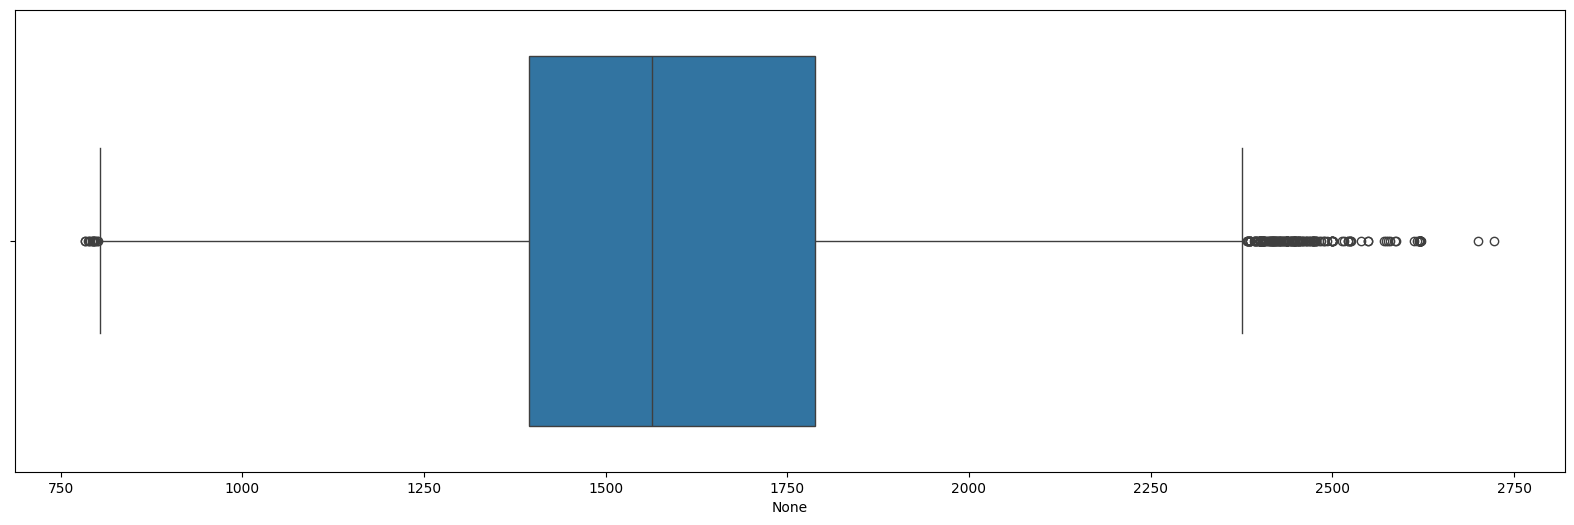

In [16]:

rating = pd.Series(chessGames['white_rating'].tolist() + chessGames['black_rating'].tolist())
plt.figure(figsize=(20, 6))
h1 = sns.boxplot(x=rating)

chessGames['rating'] = rating


I gathered and looked all the openings that were played the most to choose which one of them had the best results

In [17]:
grouped = chessGames.groupby(['opening_name', 'rating']).size().reset_index(name='count')
top_openings = (grouped.groupby('opening_name')['count'].sum().nlargest(15)).reset_index()
display(top_openings)



,opening_name,count
0,Sicilian Defense,2573
1,French Defense,1306
2,Queen's Pawn Game,1059
3,Italian Game,981
4,King's Pawn Game,917
5,Ruy Lopez,858
6,English Opening,720
7,Scandinavian Defense,716
8,Caro-Kann Defense,593
9,Scotch Game,465


Here I put my 2 data together as a violin plot. This made me notice some of the top played openings are not getting played in higher ratings and ther have a larger densisty at the lower rating games 

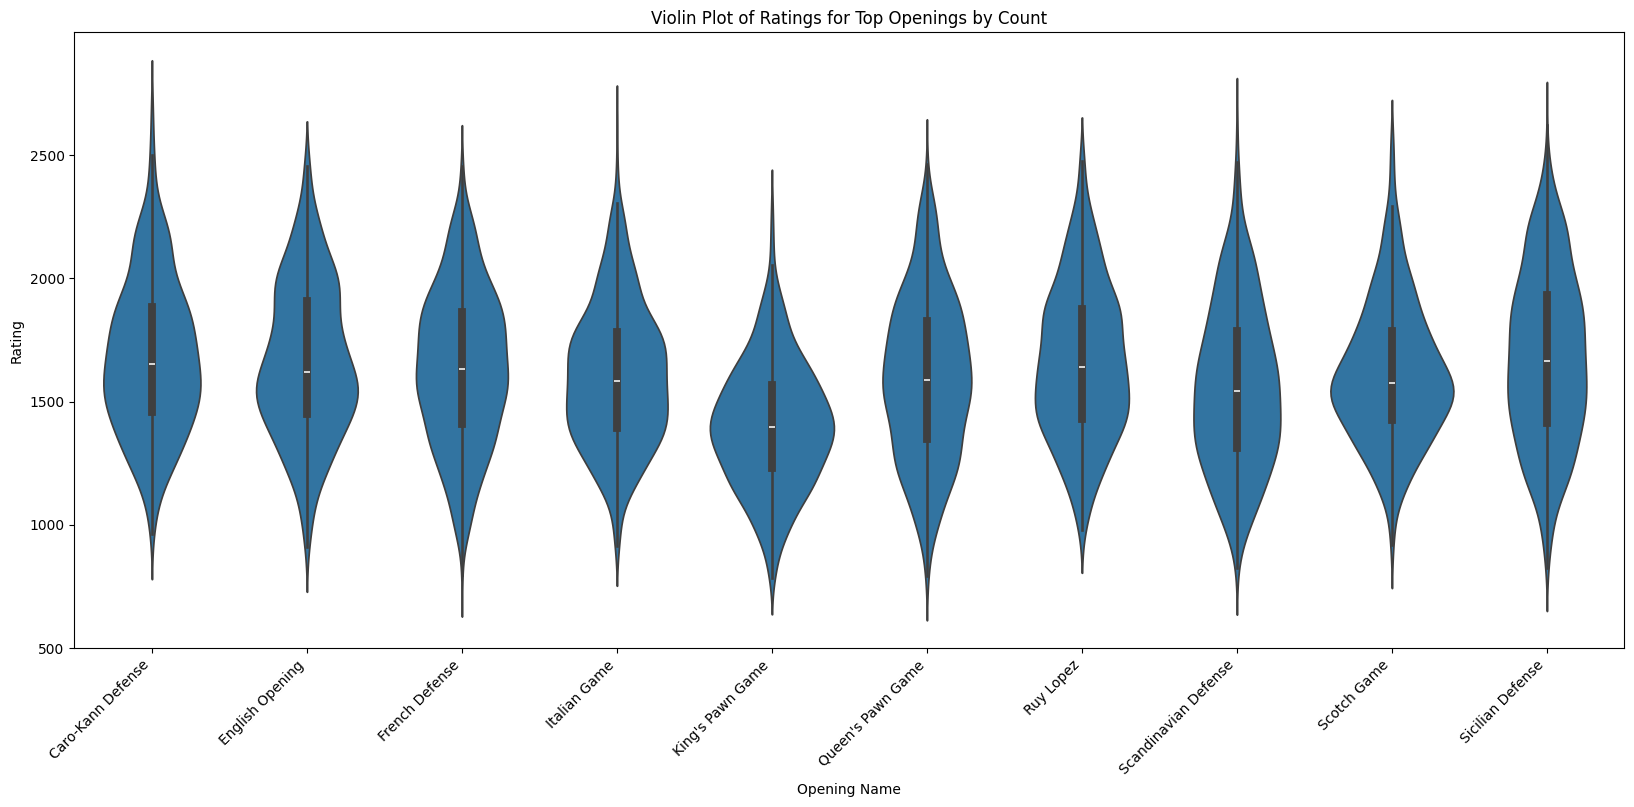

In [18]:
rouped = chessGames.groupby(['opening_name', 'rating']).size().reset_index(name='count')
opening_counts = grouped.groupby('opening_name')['count'].sum().reset_index()
top_openings = opening_counts.sort_values(by='count', ascending=False).head(10)
filtered_grouped = grouped[grouped['opening_name'].isin(top_openings['opening_name'])]
plt.figure(figsize=(20, 8))
p7 = sns.violinplot(x='opening_name', y='rating', data=filtered_grouped)
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot of Ratings for Top Openings by Count')
plt.xlabel('Opening Name')
plt.ylabel('Rating')
plt.show()


Looked at the types of games and how many data I have from them. Not having many data on bullet I decided to not look at bullet and how openigns affect bullet games. 

In [19]:
gametypecount= chessGames['game_type'].value_counts().reset_index()
display(gametypecount)

,game_type,count
0,rapid,18010
1,blitz,1972
2,bullet,76


In this section, I visualized the top chess openings for each color (white and black) and each game type. This was achieved by grouping the data, separating games based on the winning side, and identifying the type of game being played for each opening.

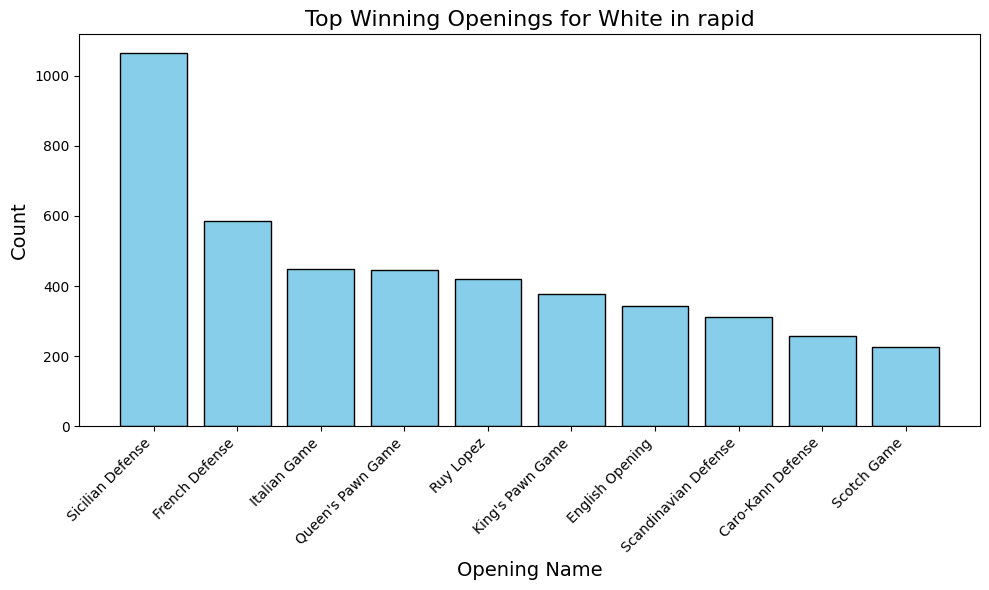

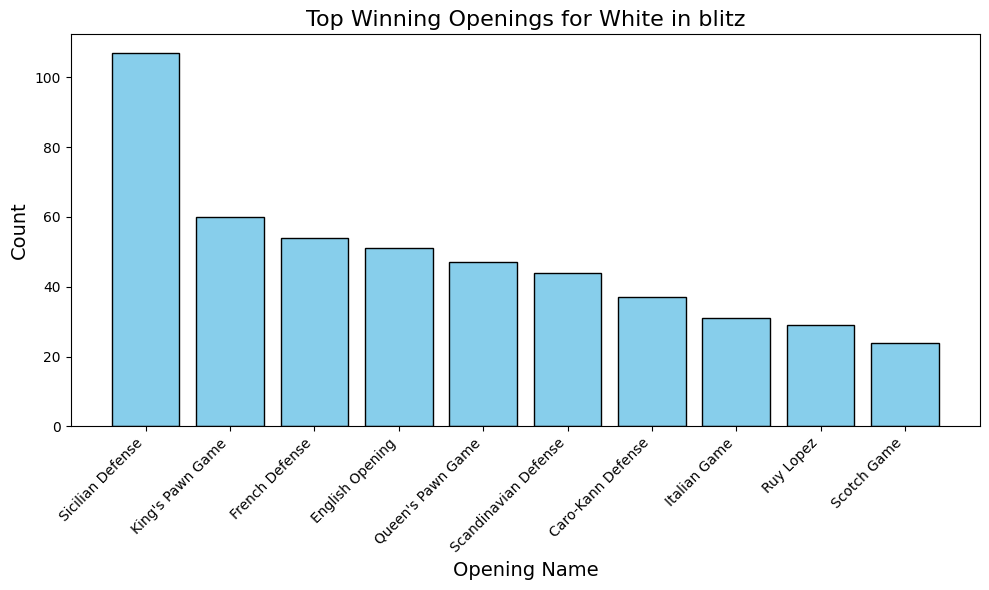

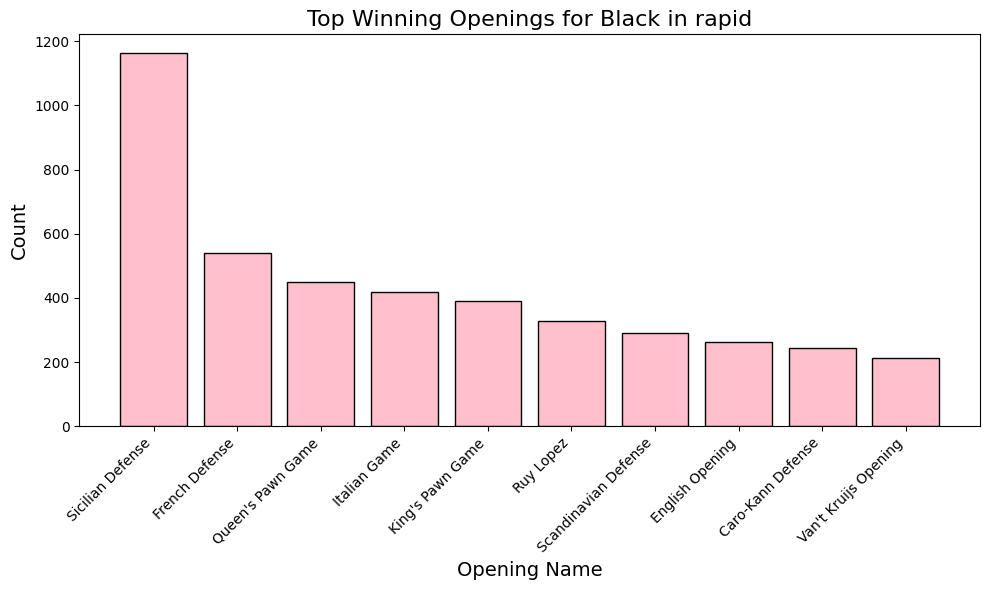

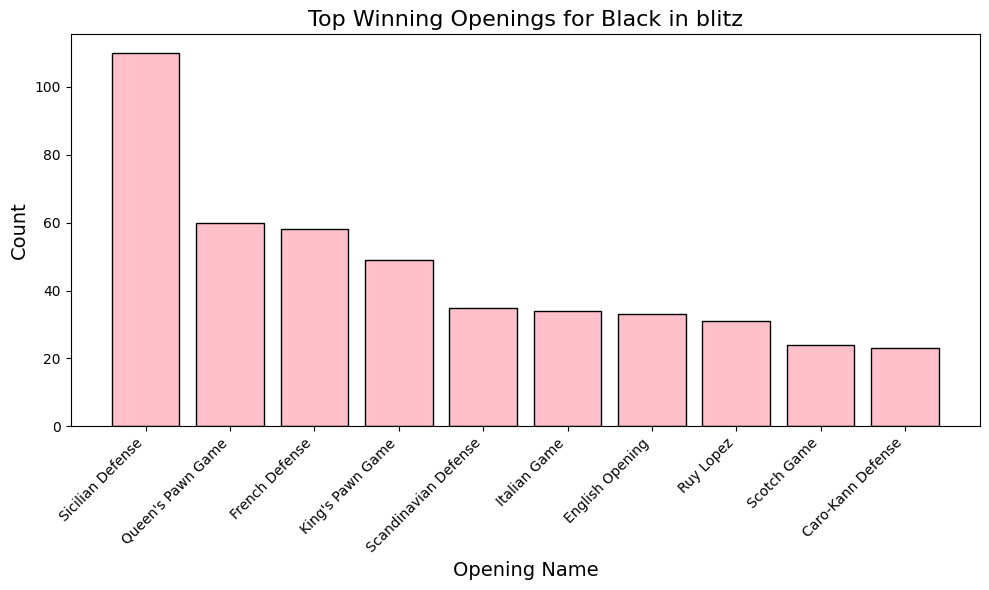

In [20]:
grouped = chessGames.groupby(['winner', 'opening_name', 'game_type']).size().reset_index(name='count')
grouped= grouped.sort_values(['winner', 'count', 'game_type'], ascending=[True, False, True])

white_data = grouped[grouped['winner'] == 'white']
black_data = grouped[grouped['winner'] == 'black']
game_types = grouped['game_type'].unique()

for game_type in game_types:
    white_subset = white_data[white_data['game_type'] == game_type].head(10)
    
    if not white_subset.empty and game_type!= "bullet":
        plt.figure(figsize=(10, 6))
        plt.bar(white_subset['opening_name'], white_subset['count'], color='skyblue', edgecolor='black')
        plt.title(f"Top Winning Openings for White in {game_type}", fontsize=16)
        plt.xlabel('Opening Name', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
for game_type in game_types:
    black_subset = black_data[black_data['game_type'] == game_type].head(10)
    
    if not black_subset.empty and game_type!= "bullet":
        plt.figure(figsize=(10, 6))
        plt.bar(black_subset['opening_name'], black_subset['count'], color='pink', edgecolor='black')
        plt.title(f"Top Winning Openings for Black in {game_type}", fontsize=16)
        plt.xlabel('Opening Name', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


Since the number of wins alone could be misleading, I calculated the win percentage for each color and visualized it using bar plots.

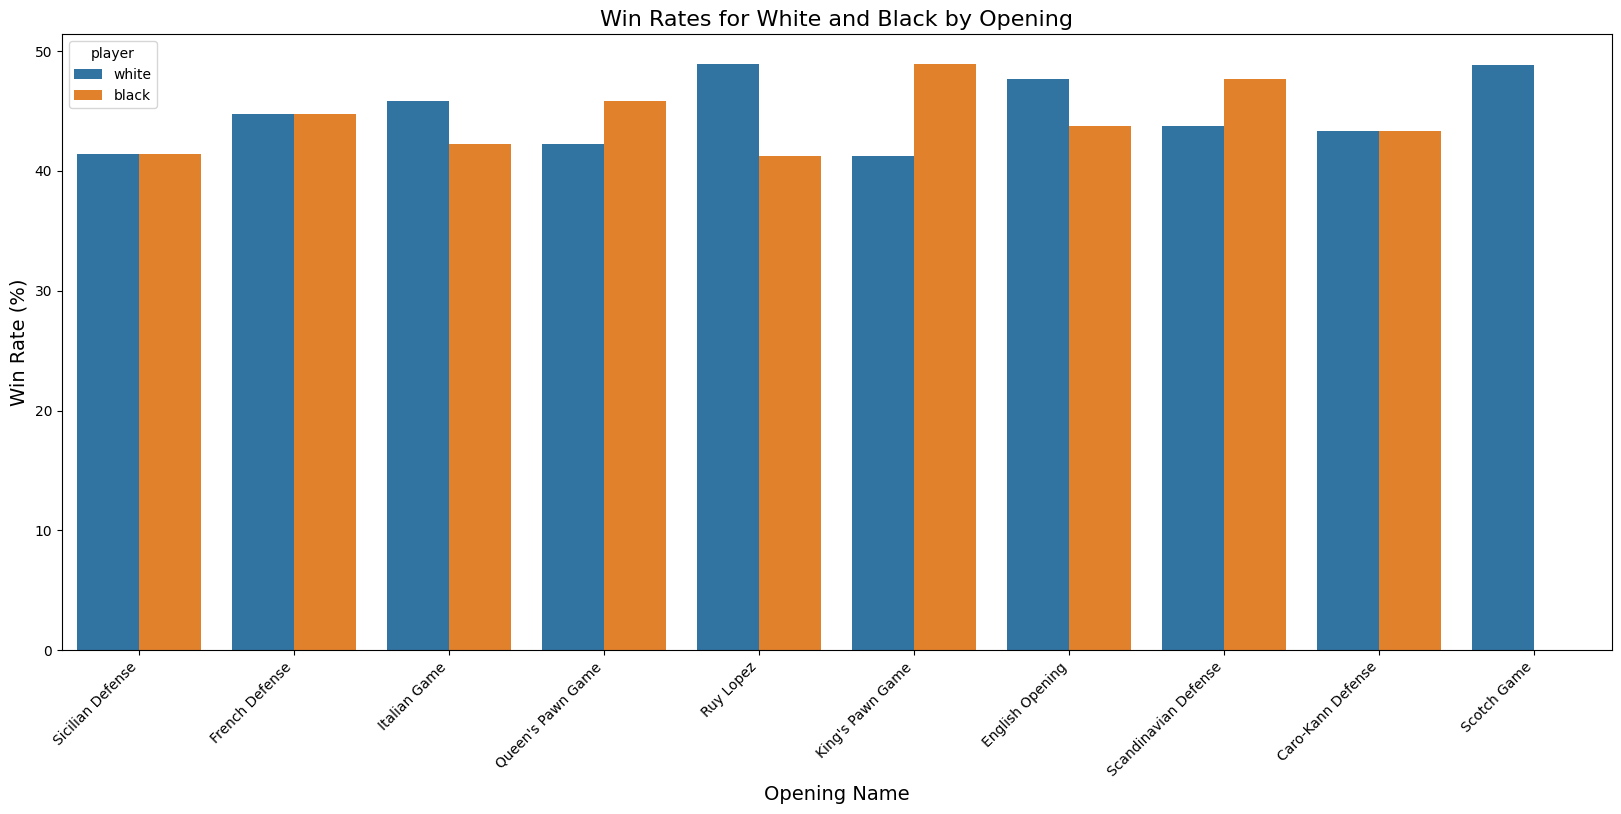

In [21]:
whitetop= white_data.head(10)
del whitetop['game_type']
whitetop.columns=['winner','opening_name','win_count'] 
temp1 = pd.merge(whitetop, top_openings, on=['opening_name'])
temp1['win_rate'] = round(temp1['win_count']/temp1['count']*100,2)
temp1['player']='white'


blacktop= black_data.head(10)
del blacktop['game_type']
blacktop.columns=['winner','opening_name','win_count'] 
temp2 = pd.merge(blacktop, top_openings, on=['opening_name'])
temp2['win_rate'] = round(temp1['win_count']/temp1['count']*100,2)
temp2['player']= 'black'
chessGameswinrate = pd.concat([temp1, temp2])
plt.figure(figsize=(20, 8))
blackplot= sns.barplot(data=chessGameswinrate, x='opening_name', y='win_rate',hue='player')
plt.xticks(rotation=45, ha='right')
plt.title('Win Rates for White and Black by Opening', fontsize=16)
plt.xlabel('Opening Name', fontsize=14)
plt.ylabel('Win Rate (%)', fontsize=14)
plt.show()




<h3 style="font-size: 24px; font-family: Arial, sans-serif; color: #4CAF50;">Discussion</h3>


In this analysis, I explored the top openings for both white and black across different game types. Initially, I grouped the data to identify the games won by each side and categorized them by the type of game being played. To ensure accuracy and avoid misleading conclusions, I calculated the win percentages for each opening instead of relying solely on the number of wins.

Based on these visualizations, the most effective openings and popular openings to avoid for each color and game type are as following.

Black: English Opening, Sicilian Defense 
White: Scotch Game, Sicilian Defense

Refrences: 
Dataset: Chess Games Dataset on Kaggle
<a href="https://www.kaggle.com/datasets/datasnaek/chess" target="_blank">https://www.kaggle.com/datasets/datasnaek/chess</a>
Discussion Thread: Kaggle Discussion - Chess Dataset
<a href="https://www.kaggle.com/datasets/datasnaek/chess/discussion/254651" target="_blank">https://www.kaggle.com/datasets/datasnaek/chess/discussion/254651</a>